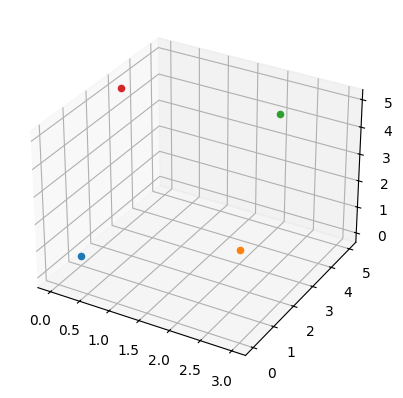

4.358898943540674 19.000000000000004 3.0 7.0
6.0 36.0 4.0 10.0
5.385164807134504 28.999999999999996 5.0 7.0
5.196152422706632 27.0 5.0 7.0
4.69041575982343 22.0 3.0 8.0
3.0 9.0 2.0 5.0


In [1]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 1, 0)
ax.scatter(3, 0, 3)
ax.scatter(2, 5, 4)
ax.scatter(0, 3, 5)
plt.show()

p1 = np.array((0, 1, 0))
p2 = np.array((3, 0, 3))
p3 = np.array((2, 5, 4))
p4 = np.array((0, 3, 5))

print(np.linalg.norm(p1-p2),np.linalg.norm(p1-p2)**2,np.linalg.norm(p1-p2,ord=np.inf),np.linalg.norm(p1-p2, ord=1))
print(np.linalg.norm(p1-p3),np.linalg.norm(p1-p3)**2,np.linalg.norm(p1-p3,ord=np.inf),np.linalg.norm(p1-p3, ord=1))
print(np.linalg.norm(p1-p4),np.linalg.norm(p1-p4)**2,np.linalg.norm(p1-p4,ord=np.inf),np.linalg.norm(p1-p4, ord=1))
print(np.linalg.norm(p2-p3),np.linalg.norm(p2-p3)**2,np.linalg.norm(p2-p3,ord=np.inf),np.linalg.norm(p2-p3, ord=1))
print(np.linalg.norm(p2-p4),np.linalg.norm(p2-p4)**2,np.linalg.norm(p2-p4,ord=np.inf),np.linalg.norm(p2-p4, ord=1))
print(np.linalg.norm(p3-p4),np.linalg.norm(p3-p4)**2,np.linalg.norm(p3-p4,ord=np.inf),np.linalg.norm(p3-p4, ord=1))

(127, 4) (23, 4) (127,) (23,)
    sepal_length  sepal_width  petal_length  petal_width
91           6.1          3.0           4.6          1.4
48           5.3          3.7           1.5          0.2
33           5.5          4.2           1.4          0.2
47           4.6          3.2           1.4          0.2
85           6.0          3.4           4.5          1.6
91    versicolor
48        setosa
33        setosa
47        setosa
85    versicolor
Name: species, dtype: object
['setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor']
['setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 've

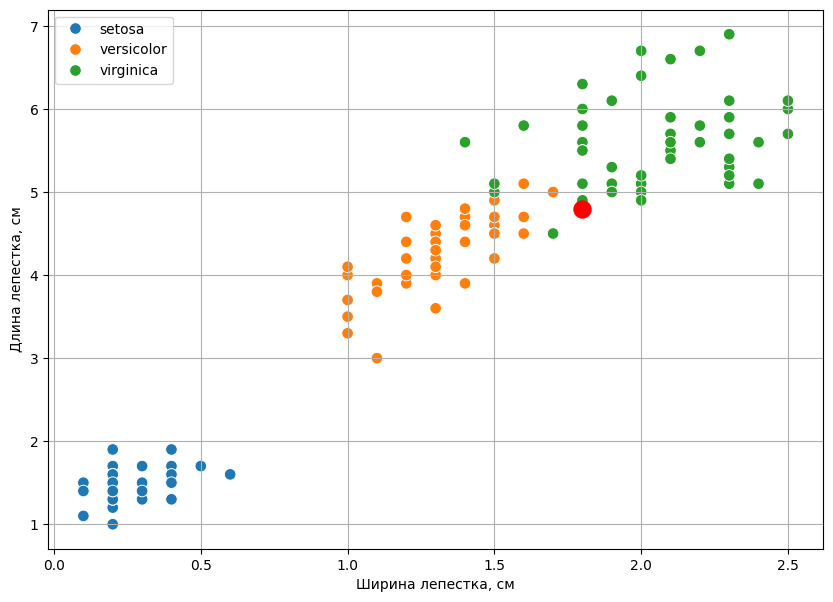

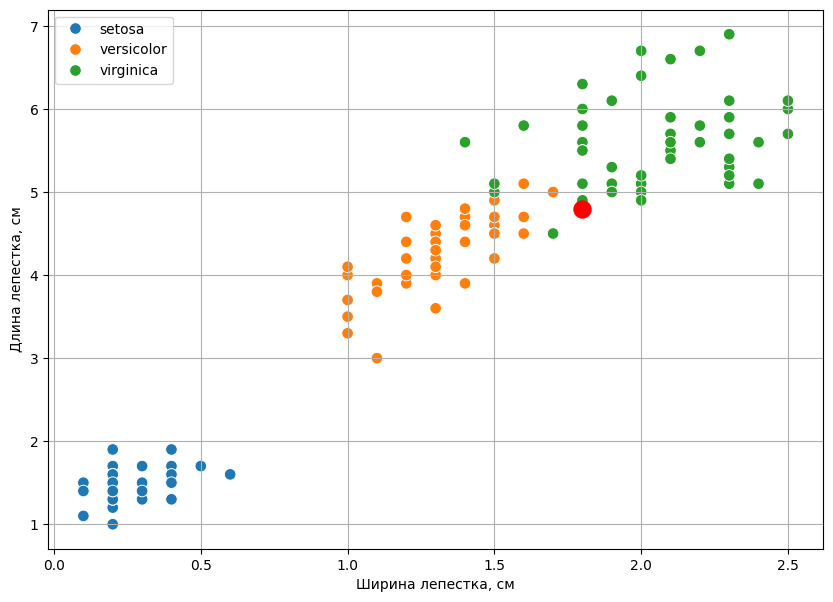

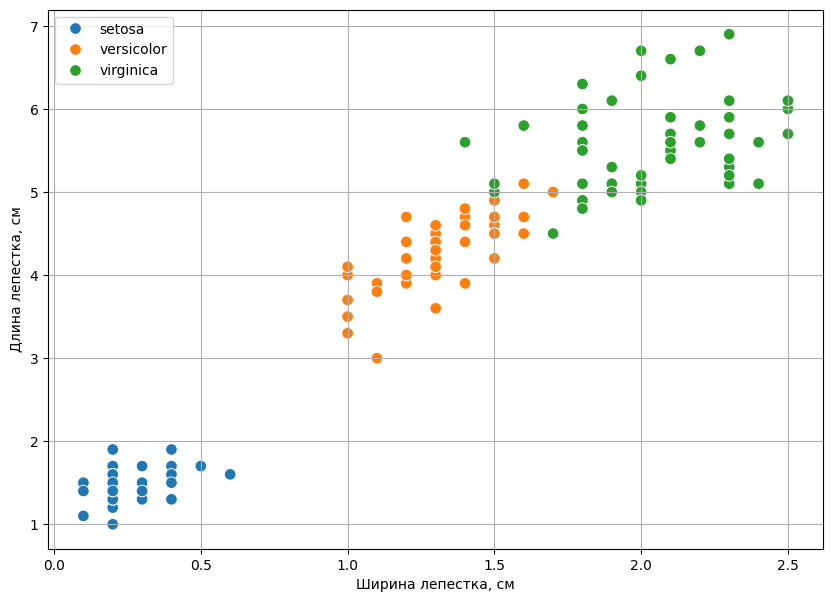

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


iris=sns.load_dataset('iris')
X_train, X_test, Y_train, Y_test=train_test_split(
    iris.iloc[:,:-1],
    iris.iloc[:,-1],
    test_size=0.15
)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(X_train.head())
print(Y_train.head())

model1=KNeighborsClassifier(n_neighbors=1)
model5=KNeighborsClassifier(n_neighbors=5)
model10=KNeighborsClassifier(n_neighbors=10)

model1.fit(X_train, Y_train)
model5.fit(X_train, Y_train)
model10.fit(X_train, Y_train)

print(model1.predict(X_test))
print(model5.predict(X_test))
print(model10.predict(X_test))


Y_pred1 = model1.predict(X_test)
Y_pred5 = model5.predict(X_test)
Y_pred10 = model10.predict(X_test)

Y_preds = [Y_pred1, Y_pred5, Y_pred10]
for Y_pred in Y_preds:
    plt.figure(figsize=(10,7))
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Ширина лепестка, см')
    plt.ylabel('Длина лепестка, см')
    plt.legend(loc=2)
    plt.grid()
    for i in range(len(Y_test)):
        if np.array(Y_test)[i] != Y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
    print(f'accuracy:{accuracy_score(Y_test, Y_pred) :.3}')

In [1]:
from sklearn.feature_extraction import DictVectorizer


characteristics = [
    {"цвет глаз": 4, "вес": 1},
    {"цвет кожи": 3, "цвет волос": 9},
    {"размер стопы": 6, "обхват талии": 6},
    {"пол": 5, "рост": 2}
]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(characteristics)
features

array([[1., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 0., 9., 0., 3.],
       [0., 6., 0., 6., 0., 0., 0., 0.],
       [0., 0., 5., 0., 2., 0., 0., 0.]])